In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('../../datas/E4/C1/C1_main_formated.csv', sep=',', encoding='UTF-8')

print(df.columns)

Index(['Breaks', 'Date', 'Time', 'HP [R]', 'O2 [R]', 'CO2 [R]', 'O2_MMOL [R]',
       'POIDS_1 [R]', 'POIDS_2 [R]', 'POIDS_3 [R]',
       ...
       'TEMPERATURE_ALLER_FROID [R]', 'TEMP_ENTREE_INF_ECORIUM [R]',
       'TEMP_ENTREE_SUP_ECORIUM [R]', 'Breaks.7',
       'TEMP_SORTIE_INF_ECORIUM [R]', 'TEMP_SORTIE_SUP_ECORIUM [R]',
       'TEMPERATURE_RETOUR_CHAUD [R]', 'TEMPERATURE_RETOUR_FROID [R]',
       'TEMP_ENTREE_FOND_ECORIUM [R]', 'TEMP_SORTIE_FOND_ECORIUM [R]'],
      dtype='object', length=119)


In [12]:
df['ecart_temp'] = df['TEMPERATURE_CONSIGNE [R]'] - df['TEMPERATURE_REPRISE [R]']
df['alerte_temp'] = (df['ecart_temp'].abs() > 2).astype(int)
df.drop(columns=['Date' , 'Time'], inplace=True)

In [13]:
df['index'] = df.index
print(df.head())


   Breaks     HP [R]     O2 [R]  CO2 [R]  O2_MMOL [R]  POIDS_1 [R]  \
0     NaN   0.000000        0.0      0.0          0.0 -1000.000000   
1     NaN  33.102051  1638300.0    359.0          0.0   178.333333   
2     NaN  33.102051  1638300.0    359.0          0.0   178.333333   
3     NaN  31.869341  1638300.0    359.0          0.0   178.000000   
4     NaN  31.477434  1638300.0    358.0          0.0   177.666667   

   POIDS_2 [R]  POIDS_3 [R]  CO2_MMOL [R]  DEFAUT_BP [B]  ...  Breaks.7  \
0 -1000.000000 -1000.000000           0.0            0.0  ...       NaN   
1   158.333333   157.666667           0.0            1.0  ...       NaN   
2   158.333333   157.666667           0.0            0.0  ...       NaN   
3   158.333333   157.666667           0.0            0.0  ...       NaN   
4   158.333333   158.000000           0.0            0.0  ...       NaN   

   TEMP_SORTIE_INF_ECORIUM [R]  TEMP_SORTIE_SUP_ECORIUM [R]  \
0                          0.0                          0.0   
1 

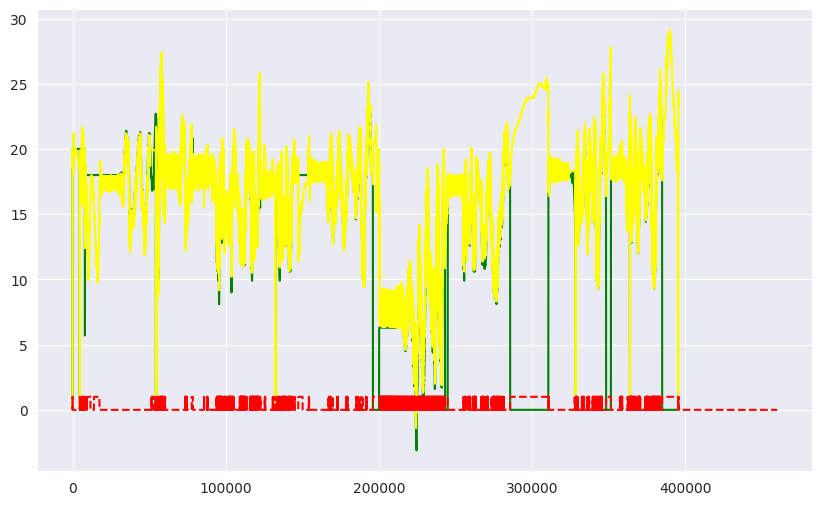

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="Données consigne", color="green")
plt.plot(df['TEMPERATURE_REPRISE [R]'], label="Données reprise", color="yellow")
plt.plot(df['alerte_temp'], label="alerte de probleme", color="red", linestyle="dashed")

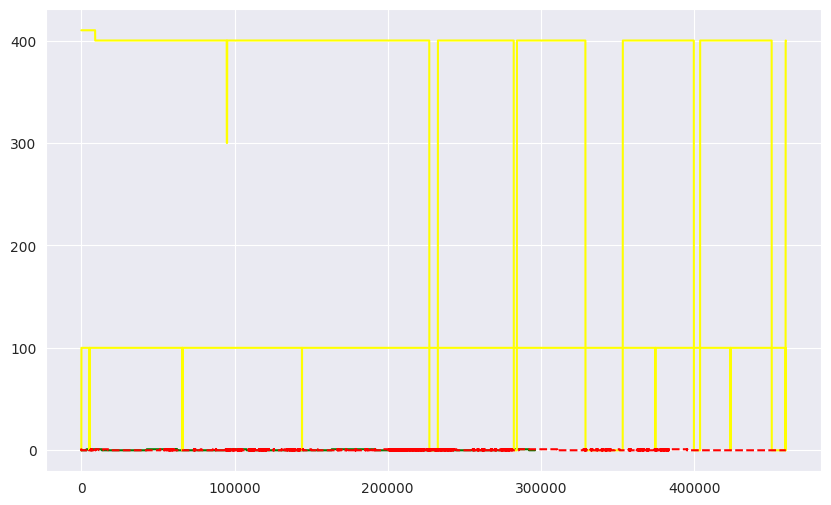

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['V2V_INJ_AIR_NEUF [B]'], label="Données consigne", color="green")
plt.plot(df['V2V_EAU_PLUIE [I]'], label="Données reprise", color="yellow")
plt.plot(df['CONSIGNE_CO2 [I]'], label="Données reprise", color="yellow")
plt.plot(df['alerte_temp'], label="alerte de probleme", color="red", linestyle="dashed")

plt.show()

In [16]:
corrmat = df.corr()
corrmat

,Breaks,HP [R],O2 [R],CO2 [R],O2_MMOL [R],POIDS_1 [R],POIDS_2 [R],POIDS_3 [R],CO2_MMOL [R],DEFAUT_BP [B],...,Breaks.7,TEMP_SORTIE_INF_ECORIUM [R],TEMP_SORTIE_SUP_ECORIUM [R],TEMPERATURE_RETOUR_CHAUD [R],TEMPERATURE_RETOUR_FROID [R],TEMP_ENTREE_FOND_ECORIUM [R],TEMP_SORTIE_FOND_ECORIUM [R],ecart_temp,alerte_temp,index
Breaks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP [R],NaN,1.000000,0.026081,-0.193427,NaN,0.248694,0.250236,0.243422,NaN,0.070359,...,NaN,0.028687,0.173156,0.207234,-0.071160,0.124265,0.175967,-0.081613,-0.024050,0.126955
O2 [R],NaN,0.026081,1.000000,0.039823,NaN,0.086059,0.090015,0.091173,NaN,0.045443,...,NaN,0.002078,0.003240,0.000377,0.002353,0.002542,0.002974,-0.002042,0.002762,0.002479
CO2 [R],NaN,-0.193427,0.039823,1.000000,NaN,0.055129,0.058305,0.058214,NaN,-0.115871,...,NaN,-0.021323,-0.085498,-0.042280,-0.004182,-0.102638,-0.090751,-0.044523,-0.043296,0.252512
O2_MMOL [R],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEMP_ENTREE_FOND_ECORIUM [R],NaN,0.124265,0.002542,-0.102638,NaN,0.317131,0.318271,0.319029,NaN,0.283433,...,NaN,0.511732,0.868891,0.404068,0.102970,1.000000,0.830442,-0.309646,0.168525,0.497286
TEMP_SORTIE_FOND_ECORIUM [R],NaN,0.175967,0.002974,-0.090751,NaN,0.330593,0.331916,0.331299,NaN,0.300315,...,NaN,0.614646,0.961598,0.388180,0.120039,0.830442,1.000000,-0.278981,0.122335,0.361067
ecart_temp,NaN,-0.081613,-0.002042,-0.044523,NaN,-0.103505,-0.105350,-0.104421,NaN,-0.054407,...,NaN,-0.139315,-0.317968,-0.114126,-0.045070,-0.309646,-0.278981,1.000000,-0.648224,-0.421578
alerte_temp,NaN,-0.024050,0.002762,-0.043296,NaN,0.061293,0.060280,0.061528,NaN,0.051525,...,NaN,0.041480,0.145043,-0.018708,0.051879,0.168525,0.122335,-0.648224,1.000000,0.041035


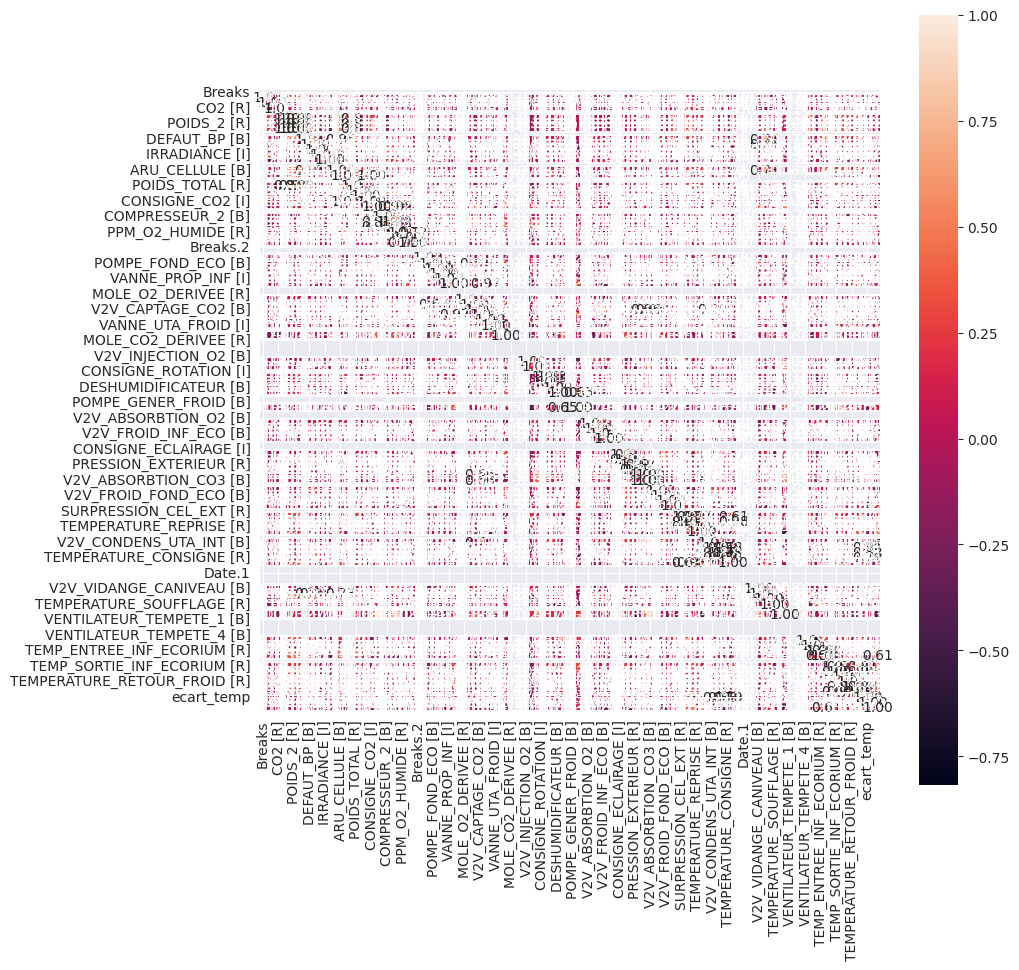

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True,annot=True, fmt='.2f', annot_kws={'size': 10});

In [22]:
# Choix des variables
features = ['TEMPERATURE_CONSIGNE [R]',
       'HYGROMETRIE_CONSIGNE [I]',
       'CONSIGNE_CO2 [I]', 'IRRADIANCE [I]', 'HUMIDIFICATEUR [I]',
       'V2V_DESHUMIDIF [B]', 'DESHUMIDIFICATEUR [B]', 'V2V_AIR_VICIE [B]',
       'V2V_EAU_PLUIE [I]', 'V2V_CAPTAGE_CO2 [B]', 'V2V_INJECTION_CO2 [B]',
       'V2V_ABSORBTION_CO2 [B]', 'V2V_INJ_AIR_NEUF [B]']

df_features = df.drop(columns=['alerte_temp'])
features = df_features
X = df[features]
y = df['alerte_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


plt.figure(figsize=(16, 6))
plot_tree(model, feature_names=features, class_names=['Normal', 'Alerte'], filled=True)
plt.title("Arbre de décision : quand apparaît une alerte ?")
plt.show()


ValueError: Boolean array expected for the condition, not object

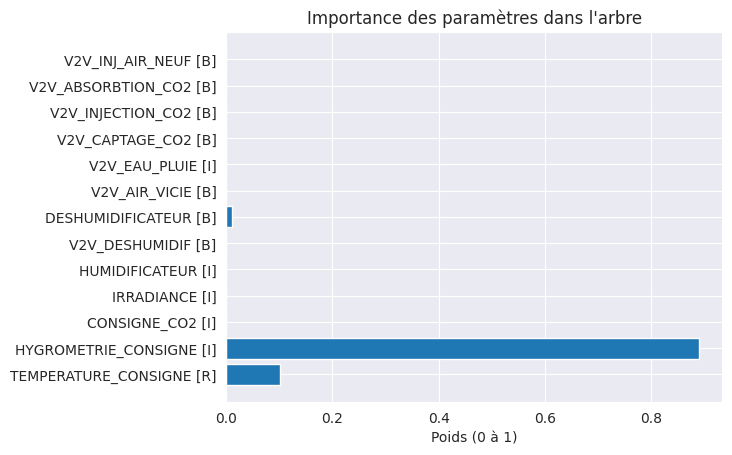

In [19]:
importances = model.feature_importances_
features = X.columns

# Affichage graphique
plt.barh(features, importances)
plt.title("Importance des paramètres dans l'arbre")
plt.xlabel("Poids (0 à 1)")
plt.show()


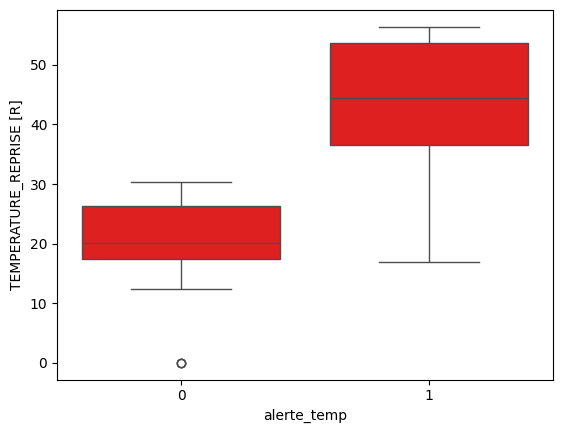

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='alerte_temp', y='TEMPERATURE_REPRISE [R]' , color='red');


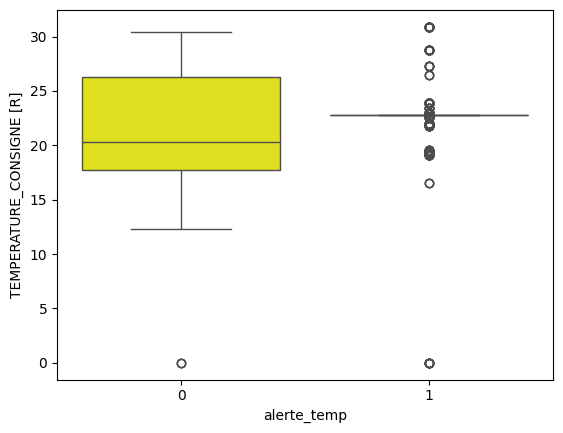

In [84]:
sns.boxplot(data=df, x='alerte_temp', y='TEMPERATURE_CONSIGNE [R]' , color='yellow');

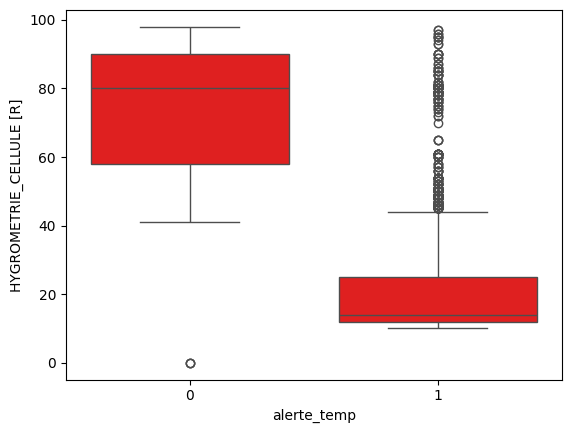

In [85]:
sns.boxplot(data=df, x='alerte_temp', y='HYGROMETRIE_CELLULE [R]' , color='red');



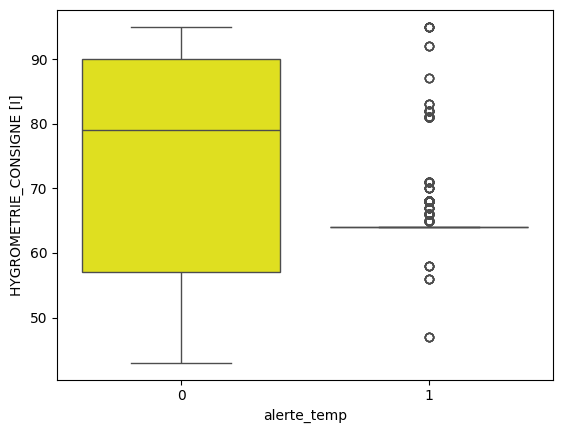

In [86]:
sns.boxplot(data=df, x='alerte_temp', y='HYGROMETRIE_CONSIGNE [I]' , color='yellow');

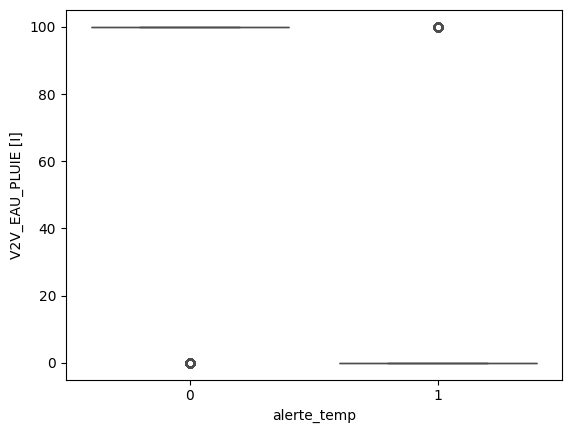

In [88]:
sns.boxplot(data=df, x='alerte_temp', y='V2V_EAU_PLUIE [I]' , color='yellow');

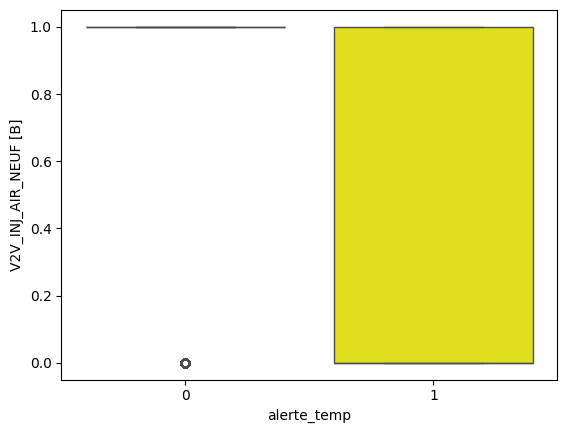

In [89]:
sns.boxplot(data=df, x='alerte_temp', y='V2V_INJ_AIR_NEUF [B]' , color='yellow');

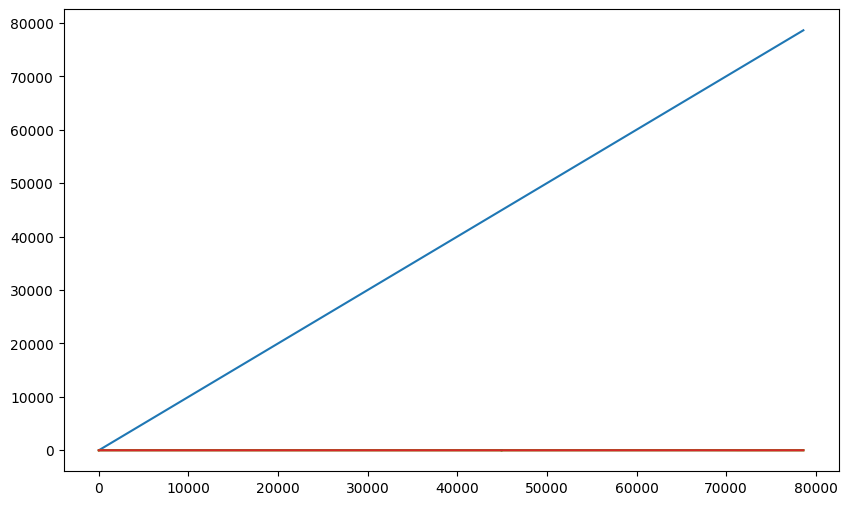

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(df['V2V_INJ_AIR_NEUF [B]'])
plt.plot(df['V2V_INJ_AIR_NEUF [B]'])
plt.plot(df['alerte_temp'])
plt.show()

<Axes: xlabel='index', ylabel='V2V_INJ_AIR_NEUF [B]'>

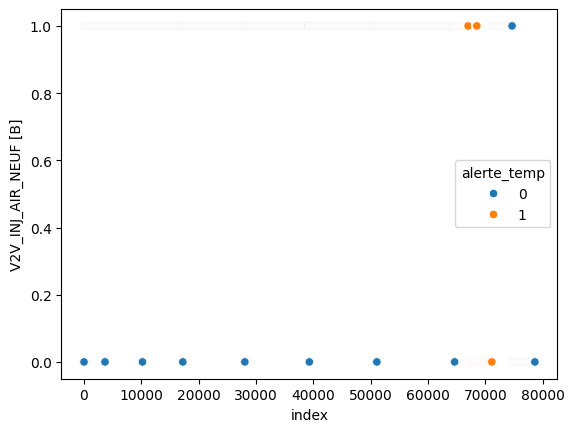

In [105]:
sns.scatterplot(data=df,
                x='index',
                y='V2V_INJ_AIR_NEUF [B]',
                hue='alerte_temp')

<Axes: xlabel='index', ylabel='CONSIGNE_CO2 [I]'>

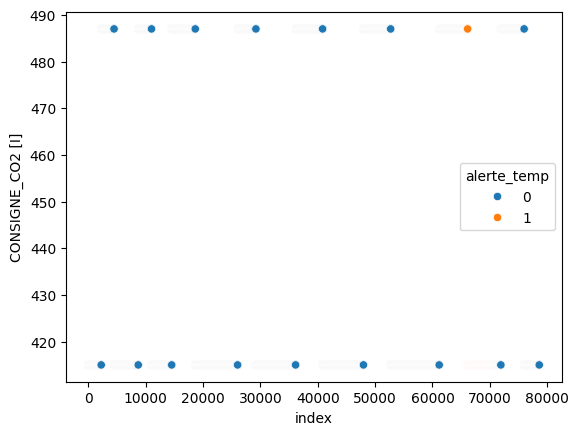

In [115]:
sns.scatterplot(data=df,
                x='index',
                y='CONSIGNE_CO2 [I]',
                hue='alerte_temp')

<Axes: xlabel='index', ylabel='HYGROMETRIE_CELLULE [R]'>

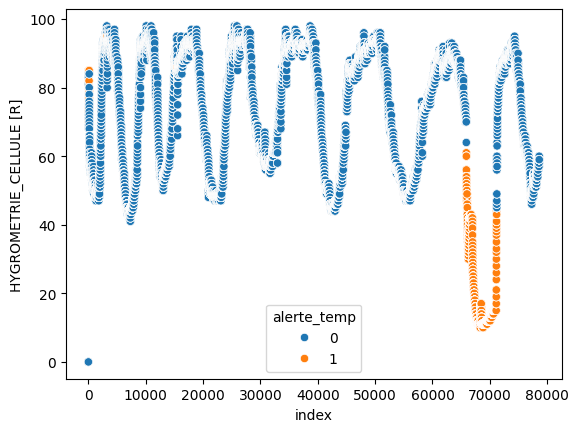

In [114]:
sns.scatterplot(data=df,
                x='index',
                y='HYGROMETRIE_CELLULE [R]',
                hue='alerte_temp')


<Axes: xlabel='index', ylabel='TEMPERATURE_REPRISE [R]'>

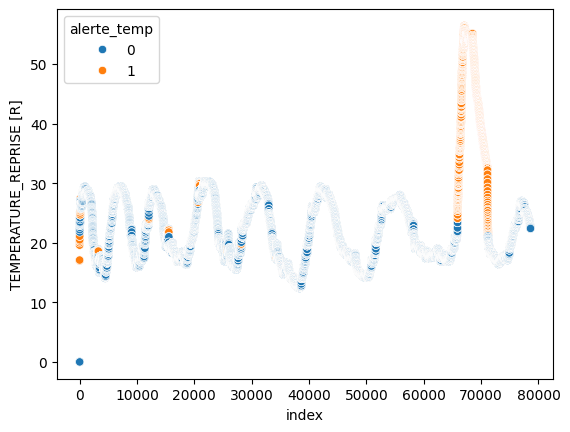

In [112]:
sns.scatterplot(data=df,
                x='index',
                y='TEMPERATURE_REPRISE [R]',
                hue='alerte_temp')


<Axes: xlabel='HYGROMETRIE_CONSIGNE [I]', ylabel='HYGROMETRIE_CELLULE [R]'>

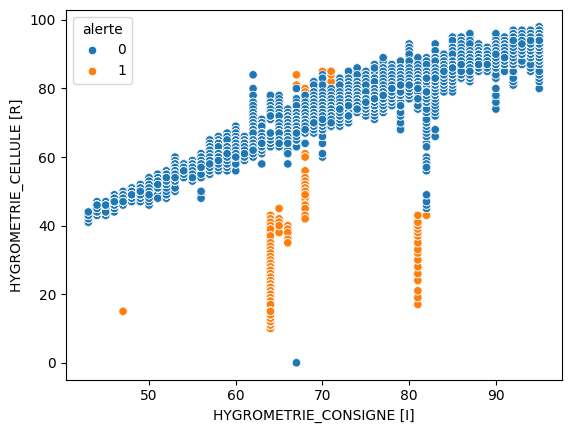

In [30]:
sns.scatterplot(data=df,
                x='HYGROMETRIE_CONSIGNE [I]',
                y='HYGROMETRIE_CELLULE [R]',
                hue='alerte')


In [72]:
sns.scatterplot(data=df,
                x='V2V_INJ_AIR_NEUF [B]',
                y='HYGROMETRIE_CELLULE [R]',
                hue='alerte')


ValueError: Could not interpret value `alerte` for `hue`. An entry with this name does not appear in `data`.